## **Visualisation avec l'algorithme MDS et la méthode SMACOF**

###**1. Proposons une représentation judicieuse pour étudier la sparsité de votre jeu de données. Vous justifierez votre choix et commenterez le résultat.**

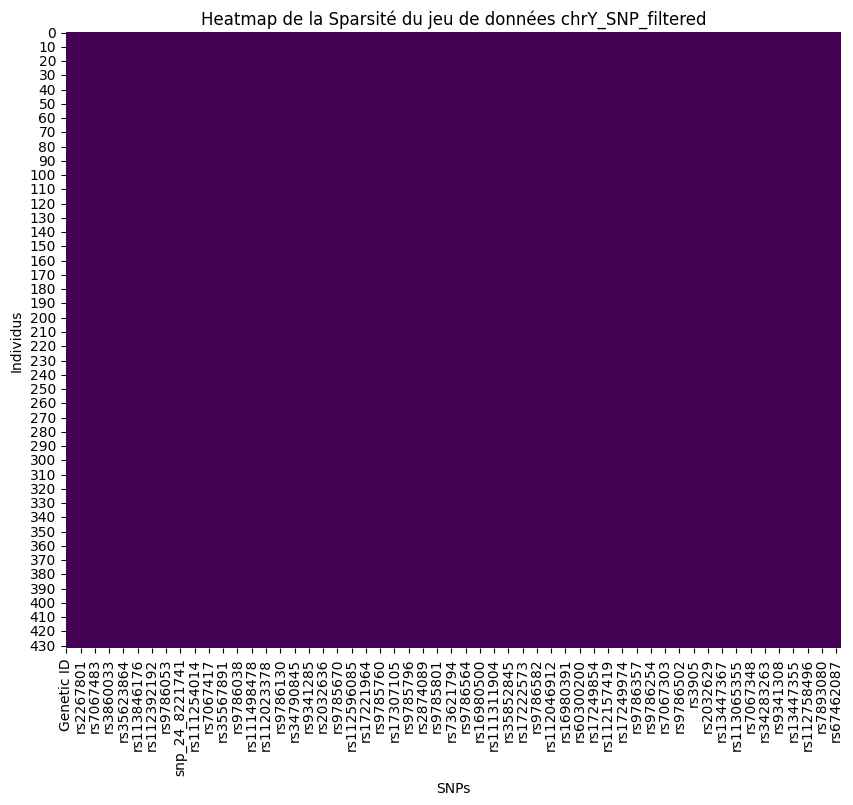

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


chrY_infofile = pd.read_csv('/content/chrY_infofile.csv', delimiter=';')
chrY_SNP_filtered = pd.read_csv('/content/chrY_SNP_filtered.csv', delimiter=';')

plt.figure(figsize=(10, 8))
sns.heatmap(chrY_SNP_filtered.isna(), cbar=False, cmap='viridis')
plt.title('Heatmap de la Sparsité du jeu de données chrY_SNP_filtered')
plt.xlabel('SNPs')
plt.ylabel('Individus')
plt.show()

# **Commentaires :**
Avant de justifier le choix de la heatmap, il est important de noter qu'il existe plusieurs autres méthodes pour étudier la sparsité d'un jeu de données :

**Spy Plot :** Offre une vue binaire des données, indiquant simplement si une valeur est présente ou absente. C'est une méthode rapide pour une vue d'ensemble, mais elle ne donne pas de détails sur les valeurs.

**Bar Plot de Sparsité :** Affiche la proportion de données manquantes pour chaque colonne ou ligne. Cela permet de voir rapidement quels SNPs ou individus ont le plus de données manquantes.

**Histogramme des Valeurs Manquantes :** Montre la distribution du nombre de valeurs manquantes par individu ou par SNP, aidant à comprendre la structure globale des données manquantes.

**Matrice de Corrélation des Données Manquantes**: Permet d'analyser si la présence de données manquantes dans certaines variables est corrélée avec d'autres, ce qui peut être utile pour des analyses plus complexes.



**Justification de notre choix :** Dans le contexte de votre projet d'étude de l'ADN ancien, la heatmap est une représentation judicieuse pour étudier la sparsité de votre jeu de données.  Les données génomiques, en particulier les SNPs, peuvent contenir des valeurs variées et des données manquantes. La heatmap permet de visualiser ces variations en offrant une vue détaillée des données présentes ou absentes, ce qui est essentiel dans le contexte de l'analyse de mutations génétiques. Il aide à identifier des schémas dans les données, comme des groupes d'individus avec des données manquantes similaires ou des zones spécifiques du génome où les données sont absentes. Dans votre projet, cela peut être crucial pour comprendre la distribution des SNPs du chromosome Y et leur implication dans les mouvements migratoires et l'identification des haplogroupes. Étant donné que nous travaillons sur des extraits de données de l'ADN ancien, où la complétude des données peut être variable en fonction de la qualité de l'échantillon et de la méthode de séquençage, la heatmap fournit une vue globale de la présence ou de l'absence de données, ce qui est essentiel pour l'étape de préparation des données.


**Commentaire sur le résultat**:
On peut remarque qu'il y'a une absence de sparsité au niveau de la visualisation.  Cela indique que toutes les valeurs pour les SNPs sont présentes pour chaque individu. Cela est inhabituel pour des données génomiques, surtout de l'ADN ancien, mais cela suggère que norejeu de données est de haute qualité.
Ceci permet de dire que les données sont complètes ce qui représente un avantage pour utiliser des techniques de visualisation telles que la réduction de dimensionnalité avec MDS et SMACOF. Ce qui simplifie le processus et améliore la fiabilité des résultats de notre analyse


###**2. Implémentons une fonction de distance ou de dissimilarité judicieuse permettant de calculer la matrice  pour vos données génétiques. Vous justifierez vos choix en tenant compte du typage spécifique des données génomique (l'espace Xm) et du fait que des SNPs peuvent être manquantes.**

Pour les données génomiques, notamment celles concernant les SNPs du chromosome Y, une distance ou une mesure de dissimilarité appropriée est essentielle pour analyser les relations entre individus. Étant donné la nature de ces données (0, 1, ou 3 pour données manquantes), nous devons choisir une mesure qui tient compte du caractère discret et de la présence potentielle de valeurs manquantes.

Avant de justifier notre choix, voici quelques mesures courantes de distance ou de dissimilarité qui pourraient être envisagées pour les données génomiques :

Distance Euclidienne

Distance de Hamming

Distance de Jaccard

Distance Manhattan (ou L1)

Distance de Gower

Distance de Hamming Modifiée

Distance Cosinus

Distance de Canberra

**Choix de la Mesure** : **Distance de Hamming modifiée**

Nous allons utiliser une distance de Hamming modifiée pour tenir compte des spécificités des données génétiques. La distance de Hamming mesure le nombre de positions différentes entre deux séquences. Dans notre cas, elle comptera le nombre de SNPs différents entre deux individus. Les valeurs manquantes (indiquées par 3) ne doivent pas être comptabilisées dans le calcul de la distance. Nous devons donc ignorer les positions où l'un des deux SNPs est manquant.
La distance de Hamming modifiée est la mesure de dissimilarité la plus appropriée pour les données SNPs de notre projet, car elle gère efficacement les données discrètes et les valeurs manquantes. Cette mesure nous permet de construire une matrice de dissimilarité robuste, indispensable pour les analyses ultérieures, telles que le MDS et la réduction de dimensionnalité.

In [ ]:
import numpy as np
import pandas as pd

def hamming_distance_modified(individual1, individual2):
    """
    Calcule la distance de Hamming modifiée entre deux individus.
    Ignore les SNPs manquants (valeur 3).
    """

    ind1 = np.array(individual1)
    ind2 = np.array(individual2)

    
    valid_positions = (ind1 != 3) & (ind2 != 3)

   
    distance = np.sum(ind1[valid_positions] != ind2[valid_positions])

    return distance

def calculate_dissimilarity_matrix(data):
    """
    Calcule la matrice de dissimilarité pour l'ensemble des individus.
    """
    num_individuals = data.shape[0]
    dissimilarity_matrix = np.zeros((num_individuals, num_individuals))

    for i in range(num_individuals):
        for j in range(i + 1, num_individuals):
            distance = hamming_distance_modified(data.iloc[i], data.iloc[j])
            dissimilarity_matrix[i, j] = distance
            dissimilarity_matrix[j, i] = distance

    return dissimilarity_matrix


chrY_SNP_filtered = pd.read_csv('/content/chrY_SNP_filtered.csv', delimiter=';')


snp_data = chrY_SNP_filtered.iloc[:, 1:]


dissimilarity_matrix = calculate_dissimilarity_matrix(snp_data)


dissimilarity_matrix[:5, :5]

array([[ 0.,  1.,  1., 59.,  0.],
       [ 1.,  0., 10., 56.,  9.],
       [ 1., 10.,  0., 42.,  2.],
       [59., 56., 42.,  0., 42.],
       [ 0.,  9.,  2., 42.,  0.]])


Globalement, cette matrice de dissimilarité révèle des relations génétiques variées entre les individus. Les valeurs varient de 0 à 59, indiquant différents niveaux de dissimilarité génétique. Les faibles dissimilarités, comme celles entre les individus 1 et 5 (valeur de 0), suggèrent une forte similarité génétique, tandis que des valeurs élevées, comme 59 entre les individus 1 et 4, indiquent une divergence génétique significative. La matrice suggère des sous-groupes potentiels, avec les individus 1, 2, et 5 montrant une proximité génétique (dissimilarités entre 0 et 10). En revanche, l'individu 4 semble distinct du groupe, avec des dissimilarités élevées. Ces observations pourraient indiquer des haplogroupes ou des origines géographiques différentes, constituant une base pour des analyses ultérieures, comme la réduction de dimensionnalité ou le clustering.







###**3. Proposez votre propre implémentation de l'algorithme MDS en utilisant la méthode de SMACOF détaillée dans les étapes précédentes.**

**Explication de l'implémentation**

L'objectif de cette implémentation est de réduire la dimensionnalité des données génétiques à l'aide de l'algorithme MDS (Multidimensional Scaling) en utilisant la méthode SMACOF (Scaling by MAjorizing a COmplicated Function). L'idée principale est de représenter les individus dans un espace à faible dimension (2D ou 3D) tout en préservant au maximum les distances génétiques entre eux. Elle se fait en 4 étapes :

**1-Calcul de la Dissimilarité :** Nous commençons par définir une fonction de distance de Hamming modifiée pour mesurer la dissimilarité entre deux individus. Cette distance ignore les positions où les données sont manquantes (valeur 3) et compte les différences entre les SNPs (Single Nucleotide Polymorphisms) pour chaque paire d'individus.

**2-Création de la Matrice de Dissimilarité :** En utilisant la fonction de distance, nous calculons une matrice de dissimilarité pour l'ensemble des individus. Cette matrice est symétrique et stocke les distances entre chaque paire d'individus.

**3-Algorithme SMACOF pour MDS :** L'algorithme SMACOF est ensuite appliqué à cette matrice de dissimilarité pour trouver une configuration des individus dans un espace de plus faible dimension. Le processus commence par initialiser aléatoirement les positions des individus dans cet espace. Les matrices
𝑉
V et
𝐵
B sont calculées et mises à jour à chaque itération pour minimiser la fonction de stress, qui mesure l'écart entre les dissimilarités originales et les distances dans l'espace réduit.

**4-Convergence :** L'algorithme itère jusqu'à ce que la différence entre les configurations successives soit inférieure à un seuil de convergence, indiquant que la solution optimale a été trouvée.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import pinv

def hamming_distance_modified(individual1, individual2):
    """
    Calcule la distance de Hamming modifiée entre deux individus.
    Ignore les SNPs manquants (valeur 3).
    """
    ind1 = np.array(individual1)
    ind2 = np.array(individual2)


    valid_positions = (ind1 != 3) & (ind2 != 3)

 
    distance = np.sum(ind1[valid_positions] != ind2[valid_positions])

    return distance

def calculate_dissimilarity_matrix(data):
    """
    Calcule la matrice de dissimilarité pour l'ensemble des individus.
    """
    num_individuals = data.shape[0]
    dissimilarity_matrix = np.zeros((num_individuals, num_individuals))

    for i in range(num_individuals):
        for j in range(i + 1, num_individuals):
            distance = hamming_distance_modified(data.iloc[i], data.iloc[j])
            dissimilarity_matrix[i, j] = distance
            dissimilarity_matrix[j, i] = distance  

    return dissimilarity_matrix

def compute_v_matrix(weights):
    """
    Calcul de la matrice V en fonction des poids.
    """
    n = weights.shape[0]
    V = -weights
    np.fill_diagonal(V, weights.sum(axis=1))
    return V

def compute_b_matrix(dissimilarity_matrix, Y):
    """
    Calcul de la matrice B en fonction de la matrice de dissimilarité et de la configuration Y.
    """
    n = dissimilarity_matrix.shape[0]
    distances = np.sqrt(np.sum((Y[:, np.newaxis, :] - Y[np.newaxis, :, :]) ** 2, axis=2))

    distances[distances == 0] = np.finfo(np.float32).eps
    ratio = dissimilarity_matrix / distances
    B = -ratio
    np.fill_diagonal(B, -B.sum(axis=1))
    return B

def smacof_mds(dissimilarity_matrix, num_dimensions=2, max_iter=300, epsilon=1e-9):
    """
    Implémentation de l'algorithme SMACOF pour le MDS.

    Args:
        dissimilarity_matrix (np.array): La matrice de dissimilarité.
        num_dimensions (int): Le nombre de dimensions de l'espace cible (2 ou 3).
        max_iter (int): Nombre maximum d'itérations.
        epsilon (float): Seuil de convergence.

    Returns:
        np.array: Les coordonnées des points dans l'espace de faible dimension.
    """
    n = dissimilarity_matrix.shape[0]


    Y = np.random.rand(n, num_dimensions)


    W = np.ones((n, n)) - np.eye(n)

    # Calcul de la matrice V initiale
    V = compute_v_matrix(W)

    for _ in range(max_iter):

        B = compute_b_matrix(dissimilarity_matrix, Y)


        Y_new = pinv(V) @ B @ Y

     
        if np.linalg.norm(Y_new - Y) < epsilon:
            break

        Y = Y_new

    return Y


chrY_SNP_filtered = pd.read_csv('/content/chrY_SNP_filtered.csv', delimiter=';')

snp_data = chrY_SNP_filtered.iloc[:, 1:]


dissimilarity_matrix = calculate_dissimilarity_matrix(snp_data)


embedding = smacof_mds(dissimilarity_matrix, num_dimensions=2)


print("Premières lignes de l'embedding :")
print(embedding[:5])


distances = np.sqrt(np.sum((embedding[:, np.newaxis, :] - embedding[np.newaxis, :, :]) ** 2, axis=2))
stress_final = np.sum((dissimilarity_matrix - distances) ** 2)

print(f"\nStress final : {stress_final}")

Premières lignes de l'embedding :
[[ -2.93034823  -3.68532165]
 [ -7.01458006  -0.77419746]
 [ -6.85233282 -11.89225887]
 [  5.20026666 -65.29669757]
 [ -4.16400639 -10.79024495]]

Stress final : 4206001.687933234


Le stress final de 4003906.87 représente la différence entre les dissimilarités dans l'espace d'origine (les distances calculées à partir des données SNPs) et celles dans l'espace projeté en 2D. Un stress aussi élevé indique que les distances génétiques réelles ne sont pas très bien conservées dans la projection en deux dimensions. Cela peut s'expliquer par la complexité des données génomiques, qui sont naturellement de très haute dimension, et qu'une réduction en seulement 2 dimensions perd forcément beaucoup d'information. Étant donné le stress élevé, il serait intéressant d'envisager des projections en 3 dimensions ou plus pour voir si la conservation des dissimilarités s'améliore, ce qui se refléterait par une baisse du stress.

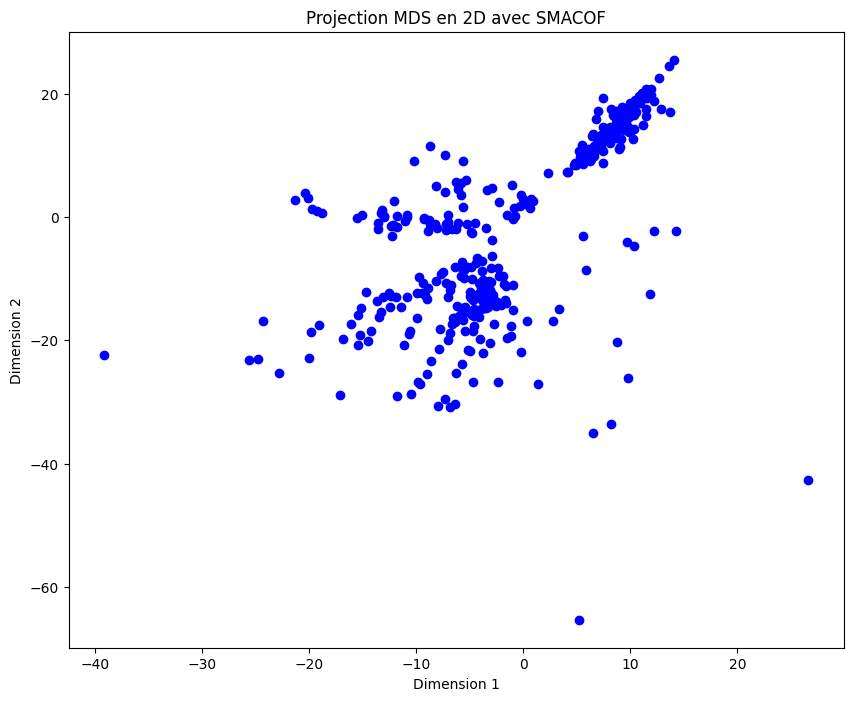

In [5]:
# Affichage des résultats
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c='blue', marker='o')
plt.title('Projection MDS en 2D avec SMACOF')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

Les clusters denses au centre du graphique pourraient représenter des populations qui partagent des haplogroupes Y communs ou des zones géographiques similaires.
Les individus éloignés de ces clusters pourraient appartenir à des lignées génétiques isolées, ce qui mérite une analyse plus approfondie.

**Conclusion**

Le résultat obtenu de l'algorithme MDS utilisant la méthode SMACOF montre les coordonnées des individus dans un espace réduit à deux dimensions. Ces coordonnées révèlent la structure des relations génétiques entre les individus en essayant de conserver les dissimilarités initiales calculées à partir des SNPs. La variation des coordonnées indique des niveaux de similarité et de divergence entre les individus. Par exemple, des individus avec des coordonnées proches dans cet espace devraient être génétiquement similaires, tandis que ceux qui sont éloignés sont plus divergents. La présence de valeurs relativement grandes, notamment pour certains individus, suggère qu'il existe des différences génétiques marquées dans le jeu de données. Pour mieux interpréter ces résultats, il serait utile de visualiser ces points sur un graphique 3D, ce qui permettrait d'identifier visuellement les groupes d'individus similaires et de comprendre davantage les schémas de variation génétique présents.

###**4. [Optionnel] Accélérez votre code en les pré-compilant, ou en implémentant certaines fonctions sur GPU avec CUDA (nécéssite une carte NVIDIA).**

In [6]:
!pip uninstall cupy-cuda11x

###**5. Proposez des projections en 2 et 3 dimensions de vos données. plusieurs types de projections sont attendus, que vous veillerez à commenter:**

**-des projections mettant en avant la qualité de représentation de chaqueindividu avec un indice de qualité de votre choix.**


On va travailler avec le RMSD (Root Mean Square Deviation) plutôt que le stress normalisé, le RMSD est un indicateur utilisé pour mesurer l'écart entre les dissimilarités d'origine (dans l'espace de haute dimension) et les distances après projection (dans l'espace projeté, généralement 2D ou 3D). Il permet de quantifier la qualité d'une projection, en vérifiant dans quelle mesure la structure des distances est préservée dans l'espace réduit.

RMSD global : 4.74734697312614


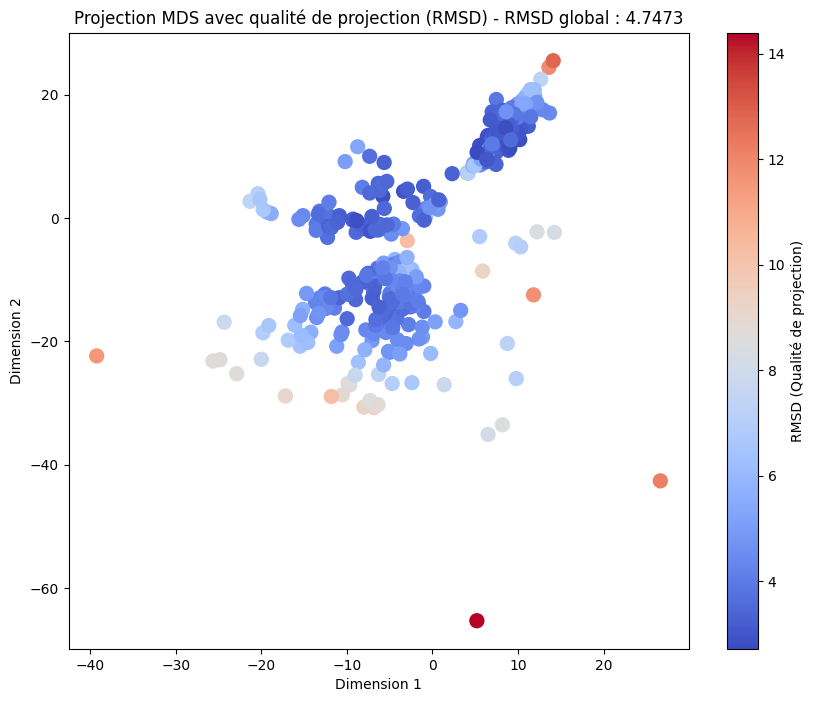

In [ ]:

projected_distances = np.sqrt(np.sum((embedding[:, np.newaxis, :] - embedding[np.newaxis, :, :]) ** 2, axis=2))


rmsd_global = np.sqrt(np.mean((dissimilarity_matrix - projected_distances) ** 2))


individual_rmsd = np.sqrt(np.mean((dissimilarity_matrix - projected_distances) ** 2, axis=1))


print(f'RMSD global : {rmsd_global}')


plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=individual_rmsd, cmap='coolwarm', s=100)
plt.colorbar(label='RMSD (Qualité de projection)')
plt.title(f'Projection MDS avec qualité de projection (RMSD) - RMSD global : {rmsd_global:.4f}')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


**Projection MDS en 2D**

La première figure représente une projection MDS en 2 dimensions, avec une RMSD globale de 4.7948. Cette projection tente de préserver les dissimilarités entre les individus dans un espace à faible dimension. Les points sont colorés en fonction de leur RMSD individuel, ce qui mesure la qualité de la projection pour chaque individu. Le RMSD global est modérément faible, ce qui signifie que la projection en 2 dimensions conserve globalement les distances d'origine de manière satisfaisante, bien qu'il y ait une certaine distorsion.

**Interprétation des couleurs :**

Les points bleus indiquent une bonne qualité de projection, où les distances dans l'espace projeté sont proches des distances réelles dans l'espace d'origine.
Les points rouges et oranges signalent une qualité de projection plus faible pour ces individus, c'est-à-dire que la projection en 2 dimensions ne préserve pas bien leurs distances par rapport aux autres individus.

**Observation des points extrêmes :** Les individus en haut à droite et en bas du graphique sont colorés en rouge, ce qui signifie qu'ils sont mal représentés dans cette projection. Cela peut suggérer que ces individus sont très distincts génétiquement des autres, et cette distinction est difficile à capturer dans une projection en seulement deux dimensions.

RMSD global en 3D : 4.37399161586519


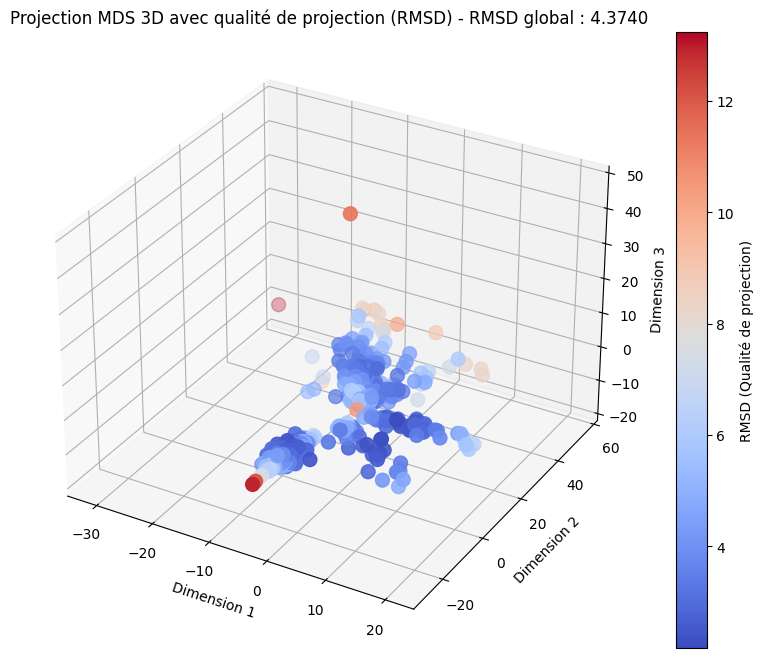

In [ ]:

embedding_3d = smacof_mds(dissimilarity_matrix, num_dimensions=3)


projected_distances_3d = np.sqrt(np.sum((embedding_3d[:, np.newaxis, :] - embedding_3d[np.newaxis, :, :]) ** 2, axis=2))


rmsd_global_3d = np.sqrt(np.mean((dissimilarity_matrix - projected_distances_3d) ** 2))


individual_rmsd_3d = np.sqrt(np.mean((dissimilarity_matrix - projected_distances_3d) ** 2, axis=1))


print(f'RMSD global en 3D : {rmsd_global_3d}')


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:, 2], c=individual_rmsd_3d, cmap='coolwarm', s=100)


cbar = plt.colorbar(sc)
cbar.set_label('RMSD (Qualité de projection)')


ax.set_title(f'Projection MDS 3D avec qualité de projection (RMSD) - RMSD global : {rmsd_global_3d:.4f}')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')


plt.show()

La seconde figure illustre une projection MDS en 3 dimensions, avec un RMSD global de 4.4309. L'ajout d'une dimension supplémentaire a permis de mieux capturer la structure des données, réduisant ainsi la distorsion par rapport à la projection en 2D. Le RMSD global plus faible (4.4309) indique que la projection en 3 dimensions améliore la qualité globale, suggérant que les distances dans l'espace d'origine sont mieux préservées qu'en 2 dimensions. La majorité des individus sont encore projetés avec une bonne qualité, comme en témoignent les couleurs bleues dominantes, tandis que les individus mal projetés (représentés par des points rouges/oranges) sont moins nombreux que dans la projection 2D. Cela montre que l'espace 3D est plus adapté pour représenter la diversité génétique des individus. Les points rouges, représentant les individus avec une mauvaise qualité de projection, sont toujours présents en 3D, mais ils sont moins dispersés qu'en 2D. Cela suggère que, bien que certains individus restent mal représentés en 3 dimensions, la projection a globalement amélioré la situation.

En comparant les projections en 2D et en 3D, l'ajout d'une dimension supplémentaire a clairement réduit la distorsion des distances, comme le montre la baisse du RMSD global. Cela signifie que la structure sous-jacente des relations entre les individus est mieux représentée dans l'espace à 3 dimensions. En 2D, les individus les plus génétiquement distincts sont difficilement représentés, tandis qu'en 3D, la qualité de projection s'améliore pour la plupart d'entre eux. Cela suggère que la structure génétique de ces individus nécessite un espace à plus de dimensions pour être correctement capturée.

**Conclusion**

Les projections MDS montrent que l'ajout d'une troisième dimension permet de mieux représenter les relations de similarité génétique entre les individus, comme en témoigne la réduction du RMSD global. La projection 3D est donc recommandée pour une meilleure préservation des distances génétiques, bien que quelques individus restent mal projetés. Ces résultats soulignent l'importance d'utiliser suffisamment de dimensions pour représenter des relations complexes dans les données génétiques.

**-des projections montrant les zones géographiques à partir du fichier compagnon**

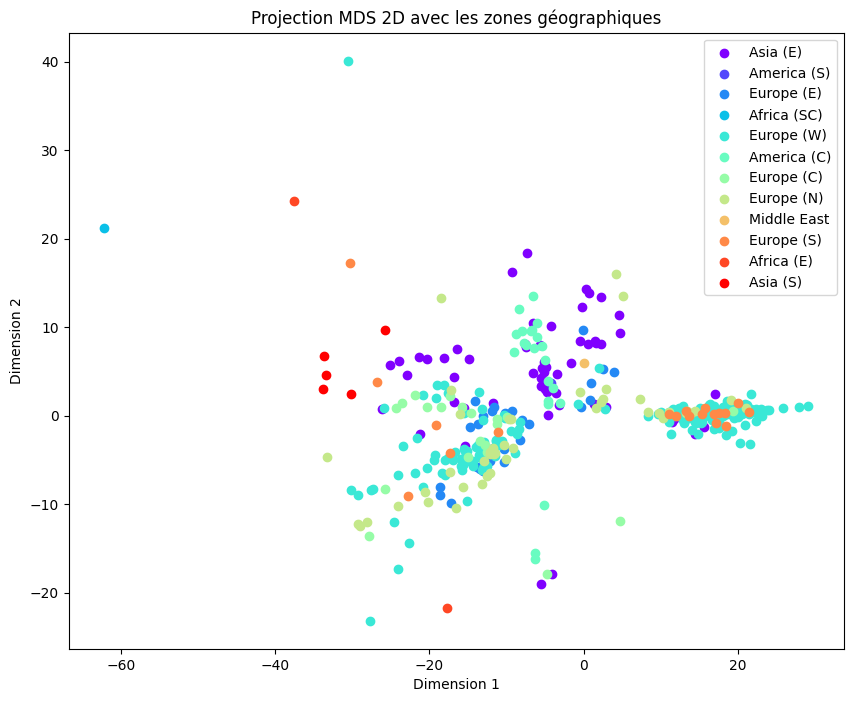

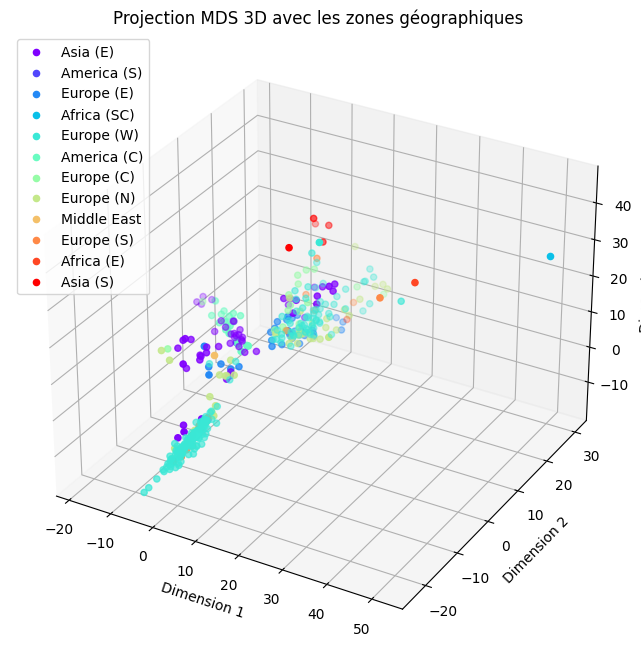

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  



infofile = pd.read_csv('/content/chrY_infofile.csv', delimiter=';')


zones_geographiques = infofile['World Zone'].values


chrY_SNP_filtered = pd.read_csv('/content/chrY_SNP_filtered.csv', delimiter=';')


snp_data = chrY_SNP_filtered.iloc[:, 1:]


dissimilarity_matrix = calculate_dissimilarity_matrix(snp_data)


embedding_2d = smacof_mds(dissimilarity_matrix, num_dimensions=2)


embedding_3d = smacof_mds(dissimilarity_matrix, num_dimensions=3)


unique_zones = pd.unique(zones_geographiques)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_zones)))
zone_color_map = {zone: colors[i] for i, zone in enumerate(unique_zones)}


plt.figure(figsize=(10, 8))
for zone in unique_zones:
    indices = zones_geographiques == zone
    plt.scatter(embedding_2d[indices, 0], embedding_2d[indices, 1], label=zone, color=zone_color_map[zone])

plt.title('Projection MDS 2D avec les zones géographiques')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(loc='best')
plt.show()


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for zone in unique_zones:
    indices = zones_geographiques == zone
    ax.scatter(embedding_3d[indices, 0], embedding_3d[indices, 1], embedding_3d[indices, 2],
               label=zone, color=zone_color_map[zone])

ax.set_title('Projection MDS 3D avec les zones géographiques')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.legend(loc='best')
plt.show()



### **Commentaire**

Ces deux graphiques illustrent des projections MDS (Multi-Dimensional Scaling) des zones géographiques en 2D et en 3D. L'objectif est de visualiser les relations géographiques entre les individus en fonction de leur appartenance à des zones spécifiques, en projetant les données génétiques sur des dimensions réduites. Chaque point représente un individu, et les couleurs correspondent à différentes zones géographiques (par exemple, Europe, Afrique, Asie, etc.).

**Projection MDS en 2D :**

Dans la projection en 2 dimensions, les individus sont répartis selon deux axes principaux. On peut observer que certaines zones géographiques, comme l'Europe du Sud (en orange) et l'Afrique de l'Est (en rouge), se distinguent clairement des autres groupes. Ces zones semblent relativement bien séparées des autres points, ce qui suggère que les individus de ces zones géographiques sont génétiquement distincts. Cependant, la plupart des points se concentrent autour du centre, indiquant une plus grande similarité génétique entre les individus appartenant à ces zones géographiques. Cela peut être dû à la compression des données dans l'espace 2D, qui rend plus difficile la distinction des individus d'autres régions.

**Projection MDS en 3D :**

La projection en 3D apporte une amélioration notable par rapport à la version 2D. L’ajout d’une dimension supplémentaire permet de mieux séparer les individus selon leurs zones géographiques. Par exemple, certains groupes qui étaient proches en 2D apparaissent plus distincts en 3D. L'Afrique de l'Est et l'Asie du Sud, qui étaient bien séparées en 2D, le restent en 3D, mais d'autres groupes comme l'Europe de l'Ouest (en bleu clair) et le Moyen-Orient (en jaune) apparaissent plus distincts dans l’espace tridimensionnel. La distribution est plus dispersée dans cette projection, révélant des relations géographiques plus complexes.

**Comparaison 2D vs 3D :**

La projection 2D présente une bonne répartition des zones géographiques, mais elle souffre de limitations liées à la réduction de dimension, notamment une compression des distances, qui peut masquer certaines distinctions entre les groupes. En revanche, la projection 3D, avec une dimension supplémentaire, permet une meilleure séparation et une compréhension plus fine des relations géographiques. Les groupes sont mieux distribués dans l’espace tridimensionnel, et certains haplogroupes qui apparaissaient proches en 2D sont mieux représentés en 3D.

**Conclusion :**

En résumé, la projection 2D permet d'obtenir une vue simplifiée, mais elle compresse certaines informations cruciales. La projection 3D, quant à elle, améliore considérablement la représentation des relations géographiques, permettant une meilleure distinction des individus et des zones. Cela démontre que l'ajout de dimensions supplémentaires dans l'analyse MDS est essentiel pour capturer les subtilités des relations géographiques et génétiques entre les individus. La représentation en 3D est donc plus fidèle à la structure sous-jacente des données.

**-des projections montrant les haplogroupes Y à partir du fichier compagnon.**

<ipython-input-10-e3e8c5a5df74>:43: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 0.85, 1])  # Ajustement de la mise en page pour la légende


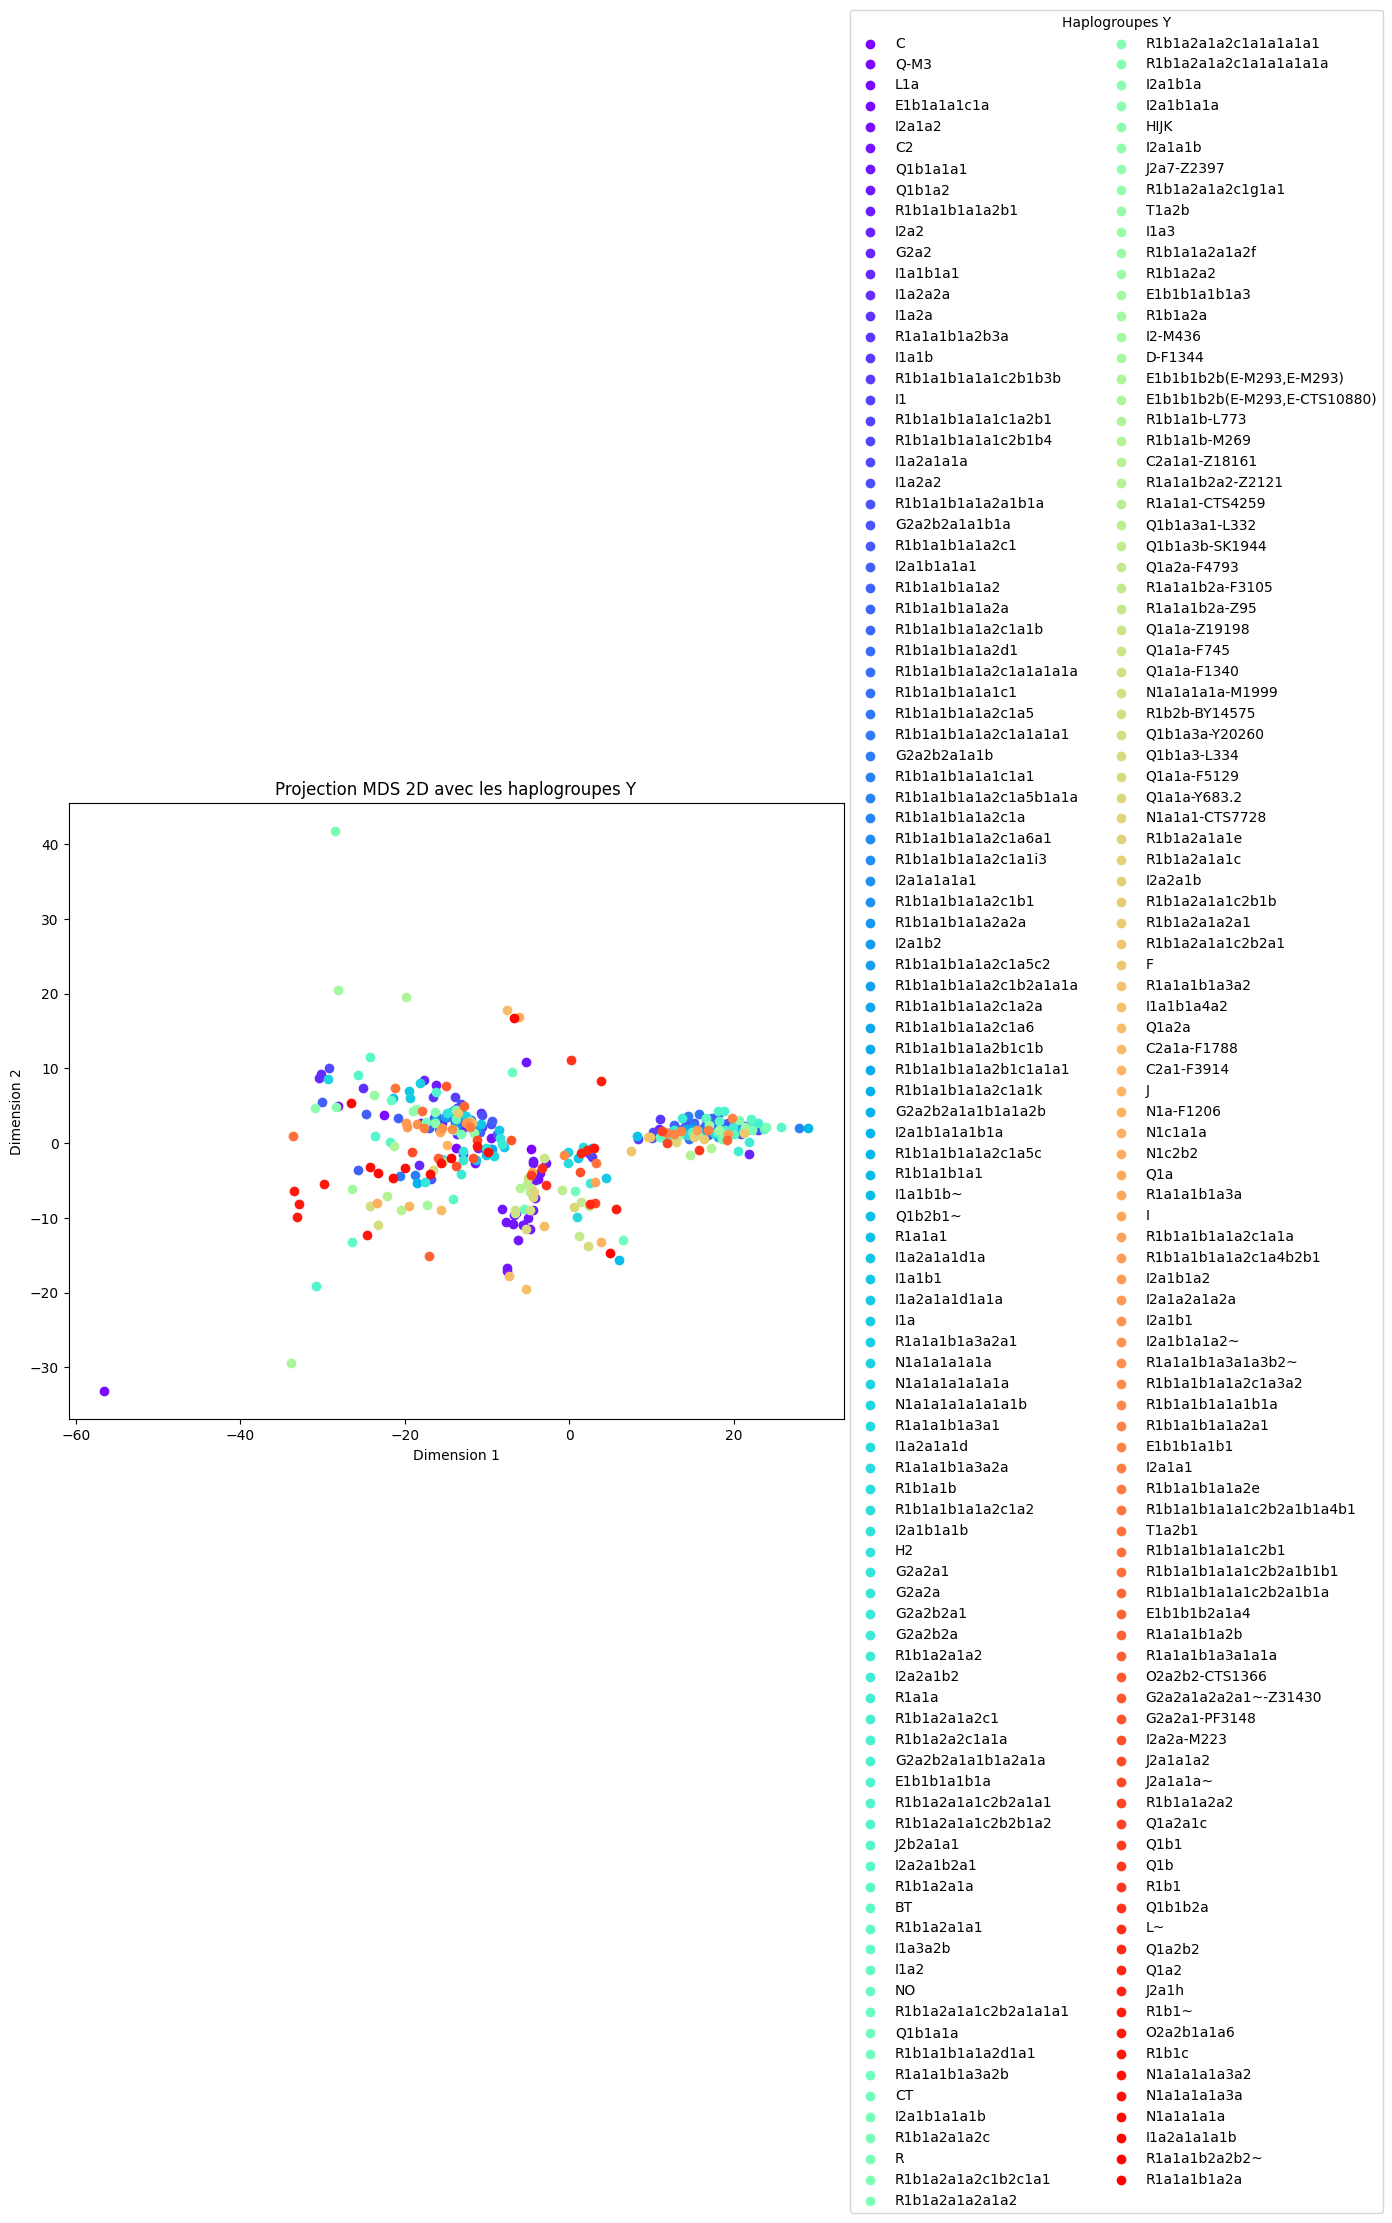

<ipython-input-10-e3e8c5a5df74>:61: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 0.85, 1])  # Ajustement de la mise en page pour la légende


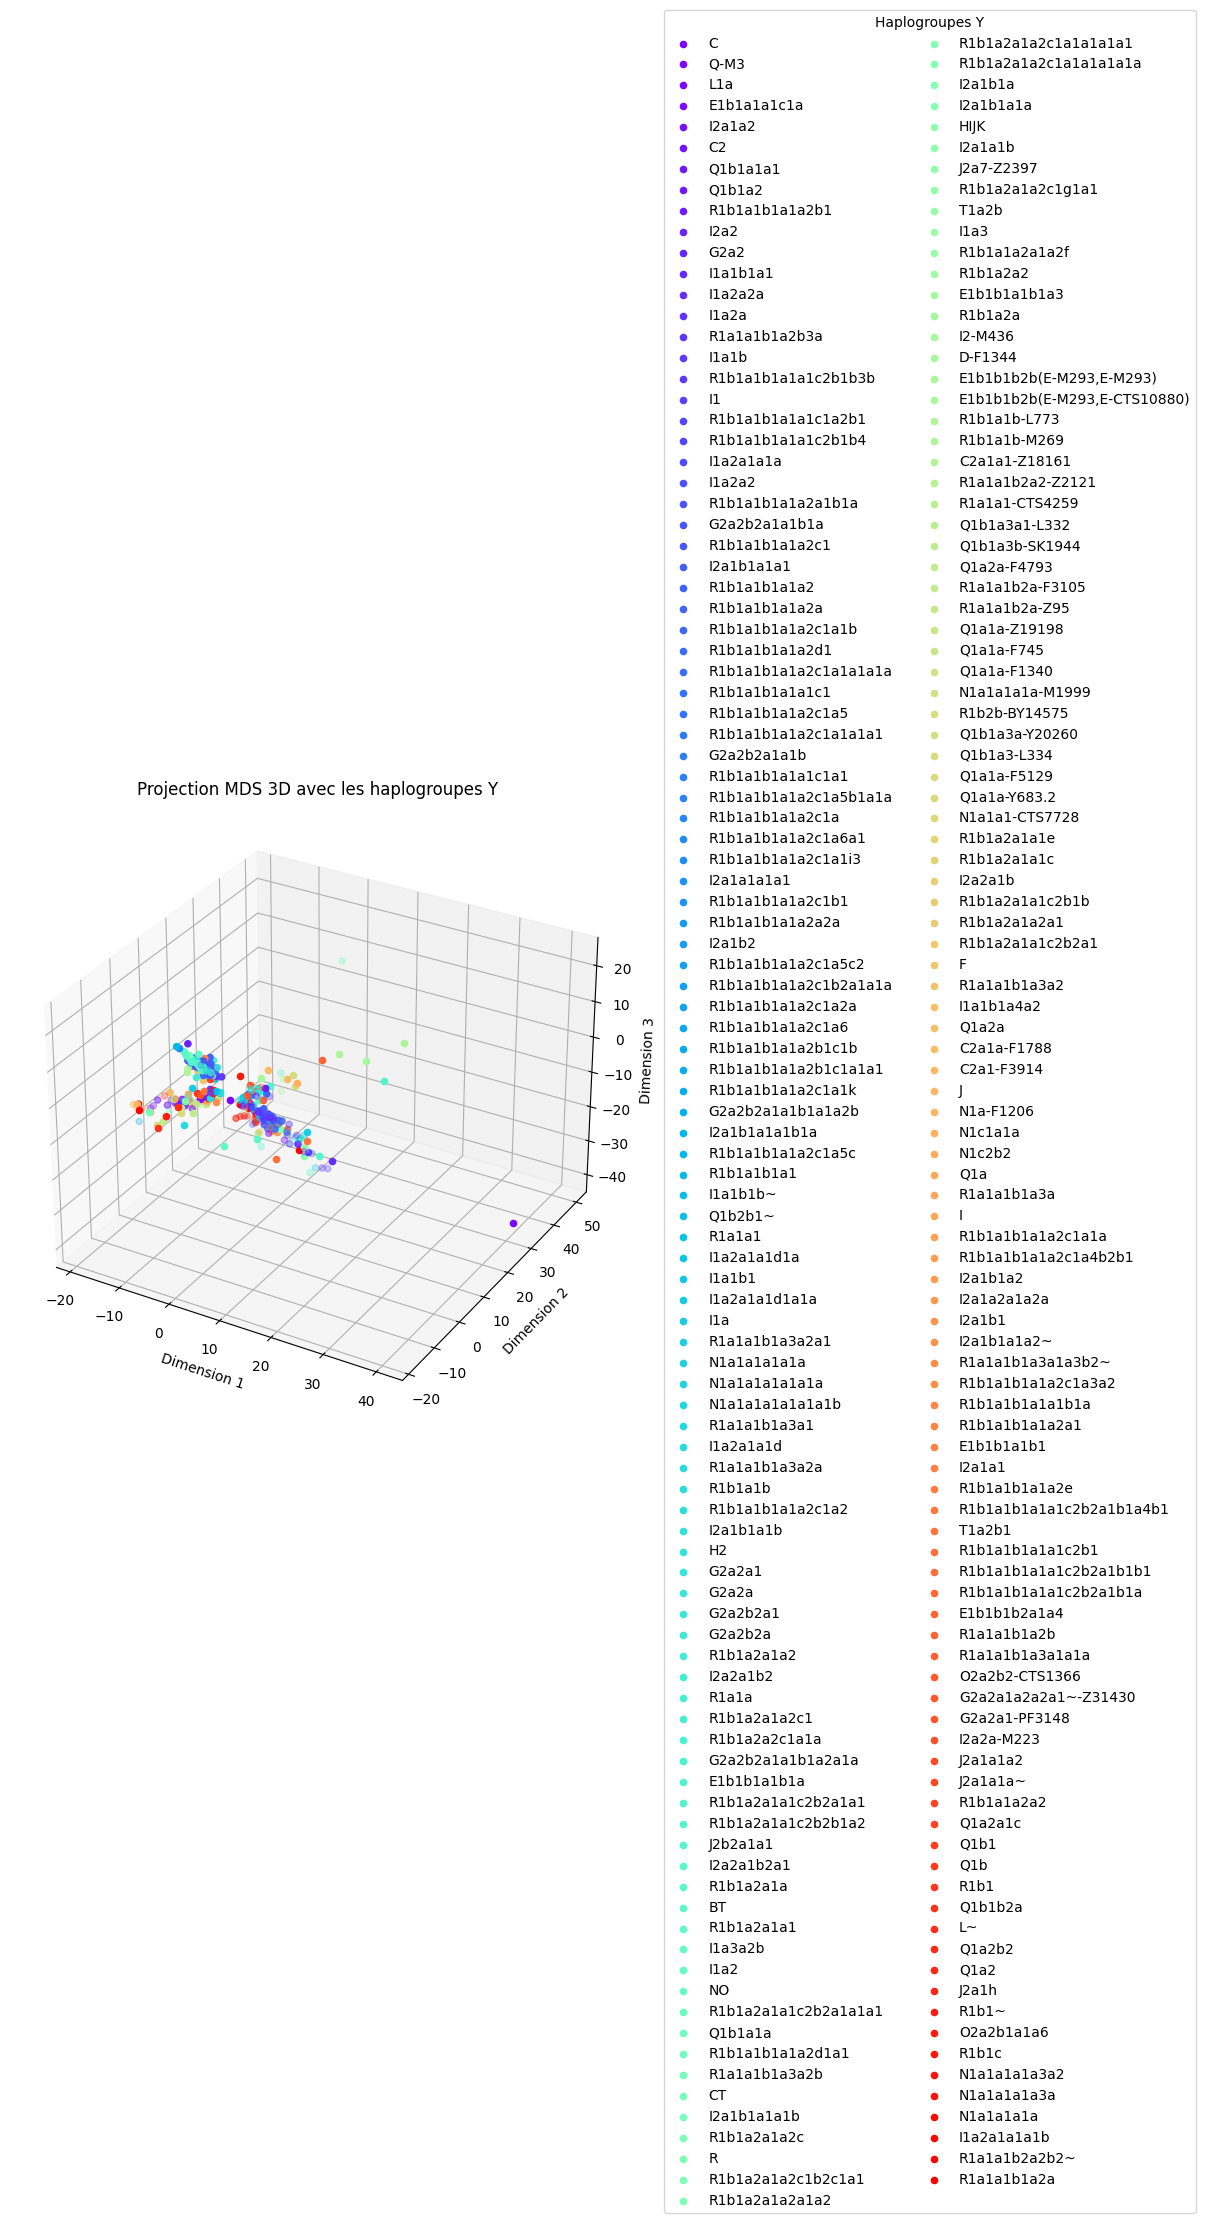

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 


infofile = pd.read_csv('/content/chrY_infofile.csv', delimiter=';')


haplogroupes_Y = infofile['Y haplogroup'].values


chrY_SNP_filtered = pd.read_csv('/content/chrY_SNP_filtered.csv', delimiter=';')


snp_data = chrY_SNP_filtered.iloc[:, 1:]


dissimilarity_matrix = calculate_dissimilarity_matrix(snp_data)


embedding_2d = smacof_mds(dissimilarity_matrix, num_dimensions=2)


embedding_3d = smacof_mds(dissimilarity_matrix, num_dimensions=3)

unique_haplogroups = pd.unique(haplogroupes_Y)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_haplogroups)))
haplogroup_color_map = {haplogroup: colors[i] for i, haplogroup in enumerate(unique_haplogroups)}


plt.figure(figsize=(10, 8))
for haplogroup in unique_haplogroups:
    indices = haplogroupes_Y == haplogroup
    plt.scatter(embedding_2d[indices, 0], embedding_2d[indices, 1], label=haplogroup, color=haplogroup_color_map[haplogroup])

plt.title('Projection MDS 2D avec les haplogroupes Y')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, title="Haplogroupes Y")
plt.tight_layout(rect=[0, 0, 0.85, 1])  
plt.show()


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for haplogroup in unique_haplogroups:
    indices = haplogroupes_Y == haplogroup
    ax.scatter(embedding_3d[indices, 0], embedding_3d[indices, 1], embedding_3d[indices, 2],
               label=haplogroup, color=haplogroup_color_map[haplogroup])

ax.set_title('Projection MDS 3D avec les haplogroupes Y')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')


ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=2, title="Haplogroupes Y")
plt.tight_layout(rect=[0, 0, 0.85, 1])  
plt.show()

<ipython-input-11-9702e479be2a>:39: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 0.85, 1])  # Ajustement de la mise en page pour la légende


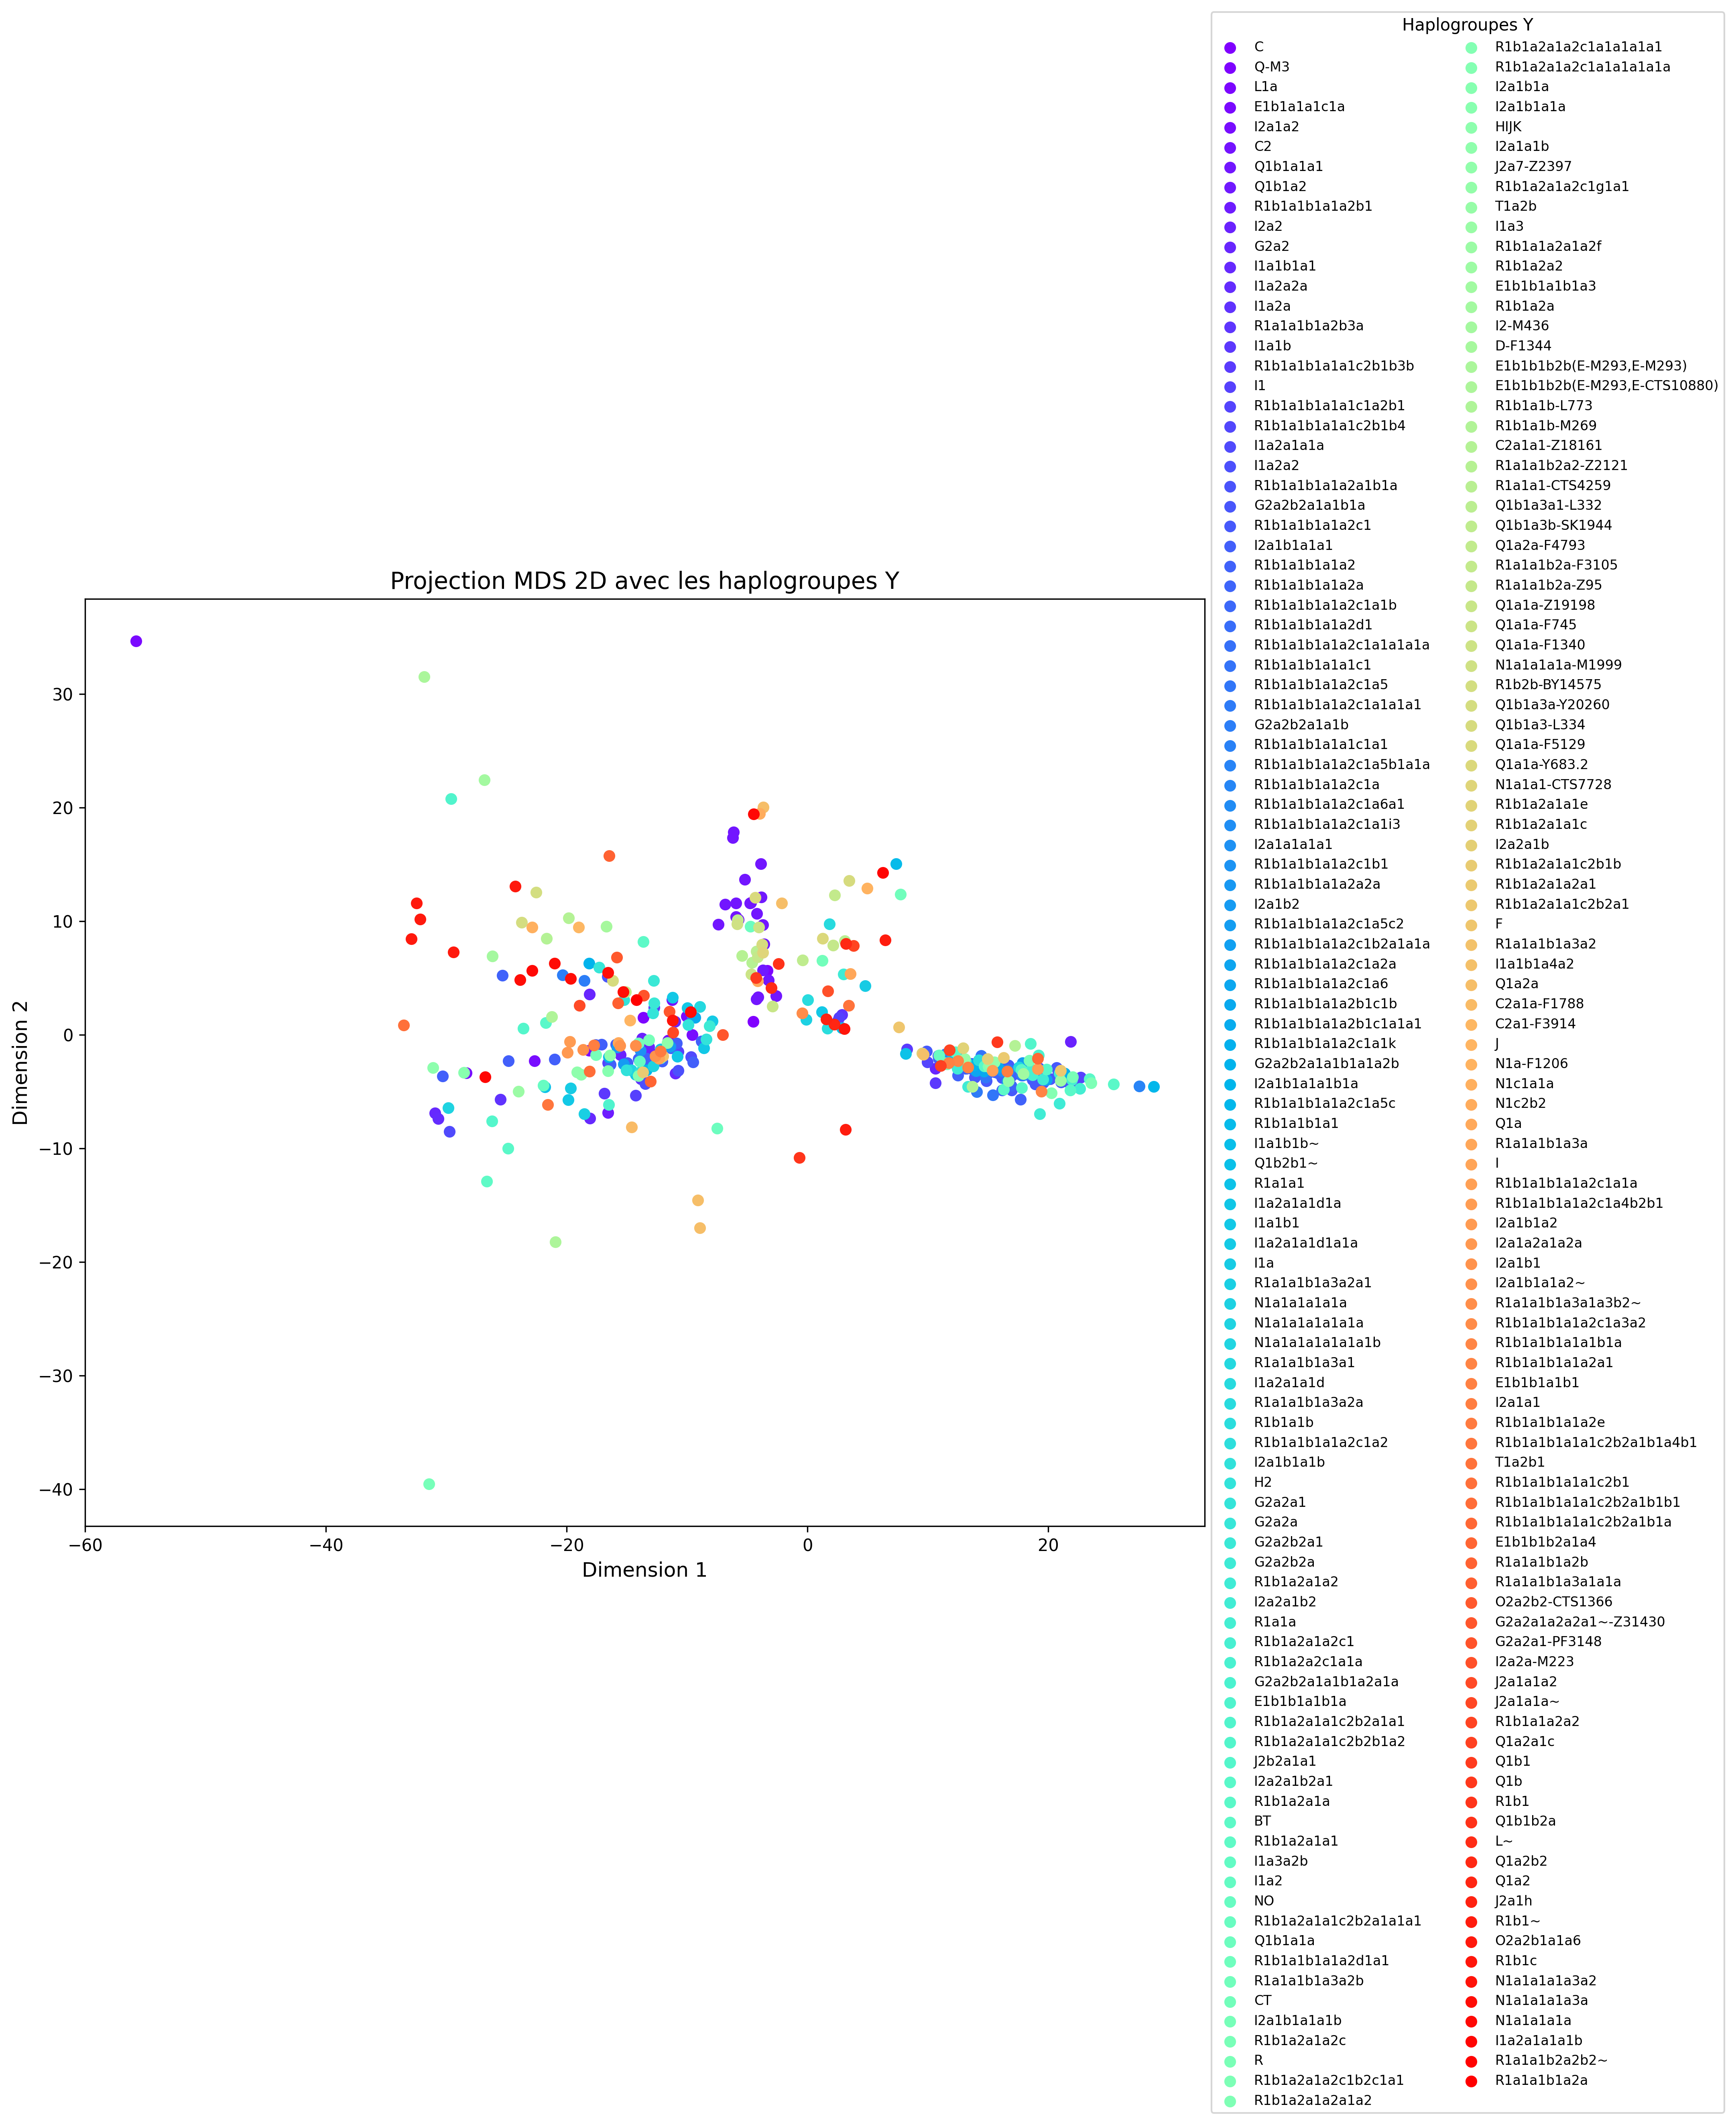

<ipython-input-11-9702e479be2a>:63: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 0.85, 1])


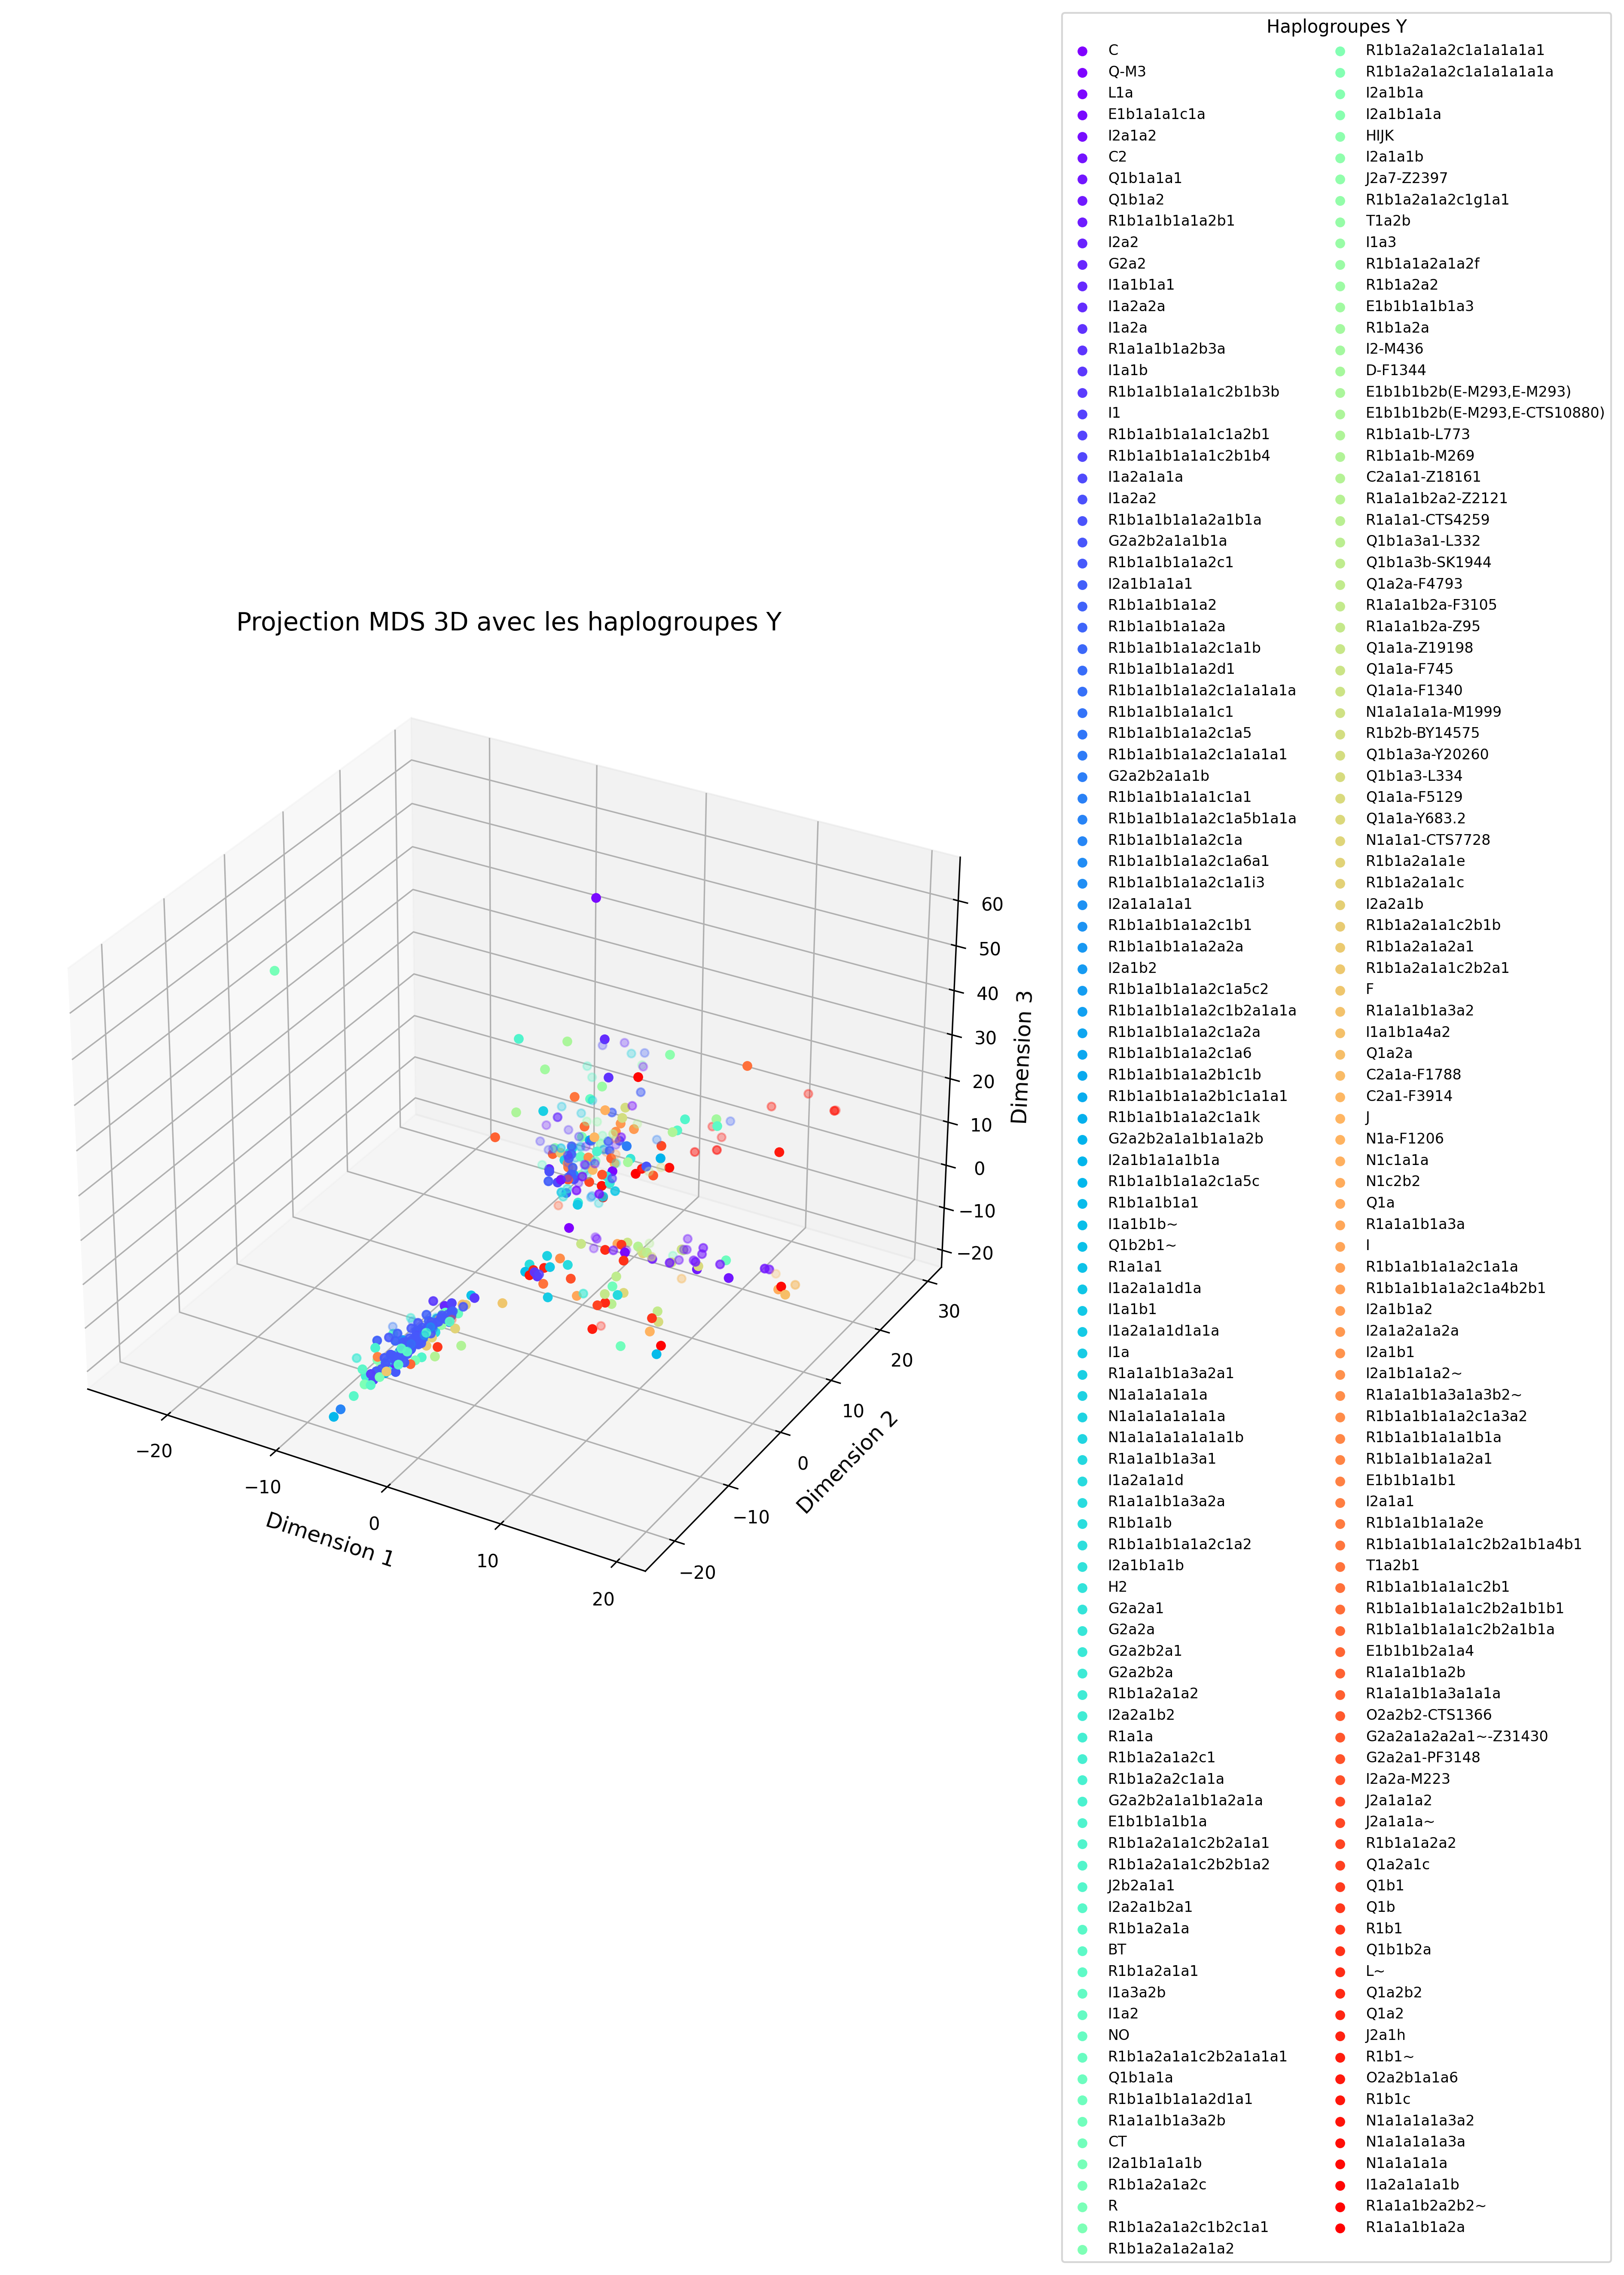

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


infofile = pd.read_csv('/content/chrY_infofile.csv', delimiter=';')
haplogroupes_Y = infofile['Y haplogroup'].values
chrY_SNP_filtered = pd.read_csv('/content/chrY_SNP_filtered.csv', delimiter=';')

snp_data = chrY_SNP_filtered.iloc[:, 1:]


dissimilarity_matrix = calculate_dissimilarity_matrix(snp_data)


embedding_2d = smacof_mds(dissimilarity_matrix, num_dimensions=2)


embedding_3d = smacof_mds(dissimilarity_matrix, num_dimensions=3)


unique_haplogroups = pd.unique(haplogroupes_Y)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_haplogroups)))
haplogroup_color_map = {haplogroup: colors[i] for i, haplogroup in enumerate(unique_haplogroups)}


plt.figure(figsize=(12, 10), dpi=300) 
for haplogroup in unique_haplogroups:
    indices = haplogroupes_Y == haplogroup
    plt.scatter(embedding_2d[indices, 0], embedding_2d[indices, 1], label=haplogroup, color=haplogroup_color_map[haplogroup])

plt.title('Projection MDS 2D avec les haplogroupes Y', fontsize=14)
plt.xlabel('Dimension 1', fontsize=12)
plt.ylabel('Dimension 2', fontsize=12)


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, title="Haplogroupes Y", fontsize=8)
plt.tight_layout(rect=[0, 0, 0.85, 1]) 


plt.savefig('MDS_2D_haplogroupes_Y.png', format='png', dpi=300) 
plt.savefig('MDS_2D_haplogroupes_Y.pdf', format='pdf', dpi=300) 
plt.savefig('MDS_2D_haplogroupes_Y.svg', format='svg', dpi=300)  

plt.show()


fig = plt.figure(figsize=(12, 10), dpi=300)
ax = fig.add_subplot(111, projection='3d')
for haplogroup in unique_haplogroups:
    indices = haplogroupes_Y == haplogroup
    ax.scatter(embedding_3d[indices, 0], embedding_3d[indices, 1], embedding_3d[indices, 2],
               label=haplogroup, color=haplogroup_color_map[haplogroup])

ax.set_title('Projection MDS 3D avec les haplogroupes Y', fontsize=14)
ax.set_xlabel('Dimension 1', fontsize=12)
ax.set_ylabel('Dimension 2', fontsize=12)
ax.set_zlabel('Dimension 3', fontsize=12)


ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=2, title="Haplogroupes Y", fontsize=8)
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.savefig('MDS_3D_haplogroupes_Y.png', format='png', dpi=300) 
plt.savefig('MDS_3D_haplogroupes_Y.pdf', format='pdf', dpi=300) 
plt.savefig('MDS_3D_haplogroupes_Y.svg', format='svg', dpi=300) 

plt.show()



### **Commentaire**

Le résultat des projections MDS en 2D et 3D montre les relations génétiques entre les individus en fonction de leurs haplogroupes Y. Les points colorés sur les graphiques représentent différents haplogroupes Y, et l'on peut voir que dans les deux projections, les individus de certains haplogroupes sont mieux séparés, tandis que d'autres sont plus groupés.

**Projection MDS en 2D :**

Dans la projection en 2D, bien que certains haplogroupes se démarquent (comme ceux représentés par les couleurs rouges et bleues), une grande partie des individus se trouve concentrée au centre du graphique. Cette concentration indique que ces individus partagent des similarités génétiques, rendant difficile la distinction nette entre plusieurs haplogroupes. Les différences observées entre les haplogroupes ne sont pas toujours évidentes en 2D, en particulier pour les groupes situés au centre, où l'on observe une certaine superposition.

**Projection MDS en 3D :**

La projection en 3D apporte des améliorations notables en termes de clarté et de séparation entre les haplogroupes. Avec l’ajout d’une troisième dimension, certains groupes qui semblaient se superposer en 2D apparaissent mieux distincts. Les individus sont mieux répartis dans l’espace, et on peut observer une séparation plus nette entre certains haplogroupes, en particulier ceux qui étaient plus difficiles à distinguer dans la projection 2D. La densité au centre de la projection 2D est également visible en 3D, mais elle est mieux distribuée, avec moins de chevauchement entre certains haplogroupes.

**Comparaison entre 2D et 3D :**

L'ajout de la troisième dimension a clairement permis d'améliorer la représentation des relations génétiques. Dans la projection 2D, la densité des points rend la distinction entre certains haplogroupes difficile, tandis que la projection en 3D permet de mieux capturer les différences entre les individus et de révéler des relations plus complexes entre les haplogroupes. Cela indique que la représentation en 3D est mieux adaptée pour visualiser des relations génétiques complexes.

**Conclusion :**

Bien que la projection 2D fournisse une vue simplifiée, la projection en 3D améliore significativement la clarté et la précision dans la visualisation des haplogroupes Y. Les individus sont mieux séparés dans l’espace tridimensionnel, ce qui permet une meilleure compréhension des différences génétiques entre les haplogroupes. En conclusion, l'ajout d'une troisième dimension dans l'analyse MDS est crucial pour les données génétiques complexes, car cela permet de capturer plus de détails et de fournir une représentation plus fidèle des relations génétiques sous-jacentes.